<a href="https://colab.research.google.com/github/bhavanakaila/HousePricePrediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.linear_model import LinearRegression, SGDRegressor

Load of Data

In [173]:
df_hyd = pd.read_csv('/content/Hyderabad.csv')

In [174]:
df_hyd.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [175]:
df_hyd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [176]:
df_hyd.rename(columns={'No. of Bedrooms': 'Not Bedrooms'}, inplace=True)

In [177]:
df_hyd.head()

,Price,Area,Location,Not Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [178]:
df_hyd.describe()

,Price,Area,Not Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.227562,0.412629,0.739873,0.709690,0.619142,0.559968,0.606434,...,0.975774,0.360207,0.607228,0.342732,0.330024,0.321287,0.334392,0.342335,0.341144,0.324861
std,8.777113e+06,746.256956,0.687330,0.419341,1.626445,1.611024,1.615231,1.624426,1.627686,1.625308,...,1.557725,1.622778,1.625256,1.621178,1.619894,1.618953,1.620347,1.621139,1.621023,1.619344
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [179]:
df_hyd.columns

Index(['Price', 'Area', 'Location', 'Not Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

Data Cleaning

In [180]:
df_hyd.replace(9, np.nan, inplace=True)
df_hyd.dropna(inplace=True)
df_hyd.isnull().sum() / len(df_hyd) * 100

,0
Price,0.0
Area,0.0
Location,0.0
Not Bedrooms,0.0
Resale,0.0
MaintenanceStaff,0.0
Gymnasium,0.0
SwimmingPool,0.0
LandscapedGardens,0.0
JoggingTrack,0.0


In [181]:
df_hyd.describe()

,Price,Area,Not Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.434000e+03,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,...,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,9.844925e+06,1644.151602,2.626130,0.221446,0.116270,0.454807,0.423583,0.329910,0.268694,0.316763,...,0.698850,0.062038,0.317584,0.043961,0.030813,0.021775,0.035333,0.043550,0.042317,0.025472
std,8.852947e+06,748.134812,0.685046,0.415305,0.320614,0.498056,0.494227,0.470277,0.443371,0.465310,...,0.458852,0.241274,0.465632,0.205050,0.172848,0.145978,0.184657,0.204133,0.201353,0.157588
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1165.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.800000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1820.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


EDA

In [182]:
num_colu = df_hyd.select_dtypes(exclude='object')

num_colu.corr()

,Price,Area,Not Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.848414,0.631230,0.212661,0.150873,0.279595,0.307008,0.272001,0.306941,0.238538,...,0.157111,0.085597,0.232410,0.016948,-0.041442,0.123374,0.091100,0.069477,0.076818,0.108696
Area,0.848414,1.000000,0.794961,0.180604,0.210016,0.301295,0.324624,0.279482,0.341898,0.276505,...,0.171242,0.061434,0.283532,-0.001150,-0.033000,0.100211,0.072674,0.056526,0.066041,0.096431
Not Bedrooms,0.631230,0.794961,1.000000,0.143768,0.194256,0.251620,0.282202,0.254163,0.303814,0.233713,...,0.172538,0.048378,0.296364,-0.029248,-0.041514,0.097882,0.068729,0.025366,0.064090,0.076831
Resale,0.212661,0.180604,0.143768,1.000000,0.025715,-0.079763,-0.066704,-0.008042,-0.017468,-0.039848,...,0.011474,0.252517,-0.057765,0.073871,-0.049289,0.198394,0.219501,0.254658,0.290930,0.190102
MaintenanceStaff,0.150873,0.210016,0.194256,0.025715,1.000000,0.309618,0.319374,0.426985,0.433594,0.414243,...,0.207375,0.023609,0.421575,-0.015260,0.276494,-0.001425,0.000006,-0.002038,0.051088,0.022707
Gymnasium,0.279595,0.301295,0.251620,-0.079763,0.309618,1.000000,0.886798,0.696285,0.650623,0.580553,...,0.518636,-0.036515,0.509419,-0.002674,0.195222,0.072899,0.120157,0.100219,0.041619,0.087987
SwimmingPool,0.307008,0.324624,0.282202,-0.066704,0.319374,0.886798,1.000000,0.730102,0.686463,0.619141,...,0.499296,-0.030887,0.531469,0.002744,0.208001,0.060104,0.110663,0.081888,0.022183,0.083053
LandscapedGardens,0.272001,0.279482,0.254163,-0.008042,0.426985,0.696285,0.730102,1.000000,0.745596,0.675507,...,0.426322,0.033267,0.606229,0.024294,0.254118,0.044992,0.111831,0.124289,0.130301,0.102855
JoggingTrack,0.306941,0.341898,0.303814,-0.017468,0.433594,0.650623,0.686463,0.745596,1.000000,0.692986,...,0.377701,-0.048307,0.657591,0.010171,0.278073,0.068326,0.054682,0.025061,0.001494,0.078480
RainWaterHarvesting,0.238538,0.276505,0.233713,-0.039848,0.414243,0.580553,0.619141,0.675507,0.692986,1.000000,...,0.416172,-0.057959,0.707860,-0.034004,0.256760,0.049689,0.027546,0.006158,0.006025,0.052469


Standardize the Dataset

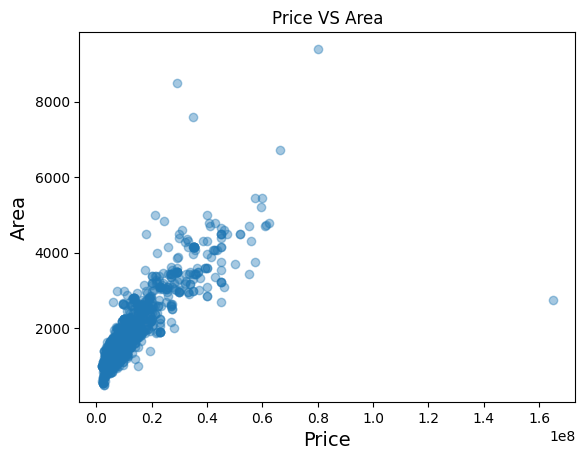

In [183]:
plt.scatter(x=df_hyd['Price'], y=df_hyd['Area'], alpha=0.4)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Area", fontsize=14)
plt.title('Price VS Area');

SGDRegression

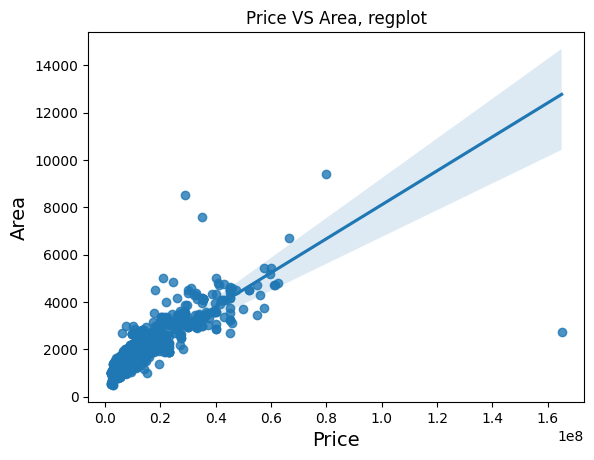

In [184]:
sns.regplot(data=df_hyd, x='Price', y='Area')
plt.xlabel("Price", fontsize=14)
plt.ylabel("Area", fontsize=14)
plt.title('Price VS Area, regplot');

In [185]:
normal_house = df_hyd['Price']<100000000
normal_house.value_counts()

,count
Price,
True,2433
False,1


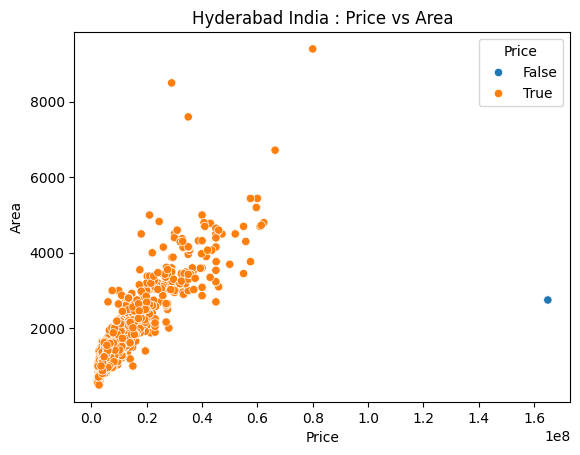

In [186]:
sns.scatterplot(df_hyd, x='Price', y='Area', hue=normal_house)
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Hyderabad India : Price vs Area');

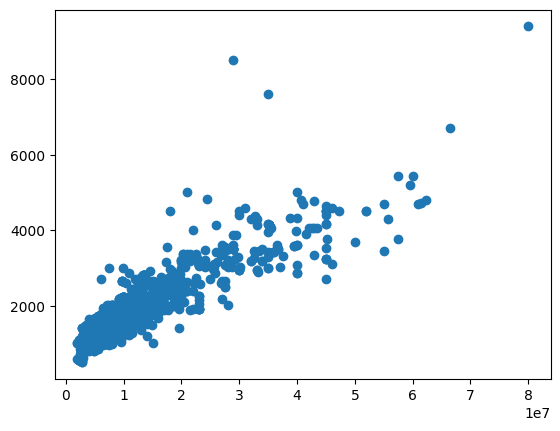

In [187]:
df_hyd = df_hyd[normal_house]
plt.scatter(x=df_hyd['Price'], y=df_hyd['Area']);

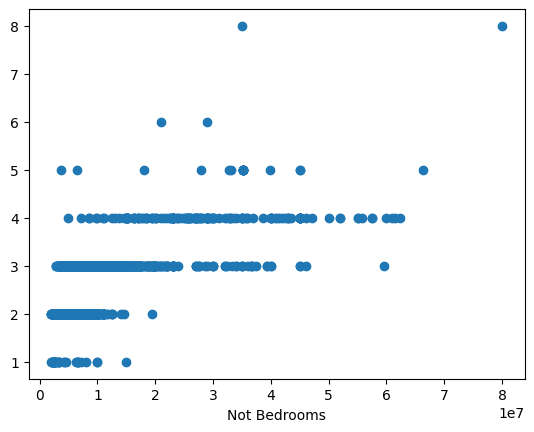

In [188]:
plt.scatter(x=df_hyd['Price'], y=df_hyd['Not Bedrooms'])
plt.xlabel('Price')
plt.xlabel('Not Bedrooms');

In [189]:
target = df_hyd['Price']

feat = df_hyd[['Area', 'Not Bedrooms']]
X_train = feat
y_train = target


In [190]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)

In [191]:
df_hyd['Location'].value_counts()

,count
Location,
Kukatpally,163
Kondapur,142
Manikonda,112
Nizampet,104
Hitech City,81
...,...
Old Alwal,1
Secunderabad Railway Station Road,1
Balapur,1


In [192]:
#new
df_hyd['Price_per_sqft'] = df_hyd['Price'] / df_hyd['Area']
df_hyd['Bed_Area_Ratio'] = df_hyd['Not Bedrooms'] / df_hyd['Area']





In [193]:
feat = df_hyd[['Area', 'Not Bedrooms', 'Price_per_sqft', 'Bed_Area_Ratio', 'Location']]

target = df_hyd['Price']

In [194]:
df_hyd = pd.get_dummies(df_hyd, columns=['Location'], drop_first=True)

In [195]:
df_hyd['LogPrice'] = np.log1p(df_hyd['Price'])

In [196]:
target = df_hyd['LogPrice']
features = df_hyd.drop(['Price', 'LogPrice'], axis=1)

In [197]:
lin_reg = LinearRegression()

lin_reg.fit(X_train_scaler, y_train)

LinearRegression()

In [198]:
y_pred_lin = lin_reg.predict(X_train_scaler)
y_pred_lin[:5]


array([ 7322497.17621288, 28148075.80510898,  7082245.53460325,
        5460611.71024154,  5192993.98921841])

In [199]:
mea_absolut = mean_absolute_error(y_train, y_pred_lin)
mea_squar = mean_squared_error(y_train, y_pred_lin)
print("This is Mean absolute error", mea_absolut)
print("This is Mean squar error", mea_squar)

This is Mean absolute error 2170752.03096151
This is Mean squar error 13095533347892.154


In [200]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.01, shuffle=True, max_iter=1000)
sgd_reg.fit(X_train_scaler, y_train)


SGDRegressor(penalty=None)

In [201]:
y_pred_sgd = sgd_reg.predict(X_train_scaler)
y_pred_sgd[:5]


array([ 7273424.34345687, 28476794.02182163,  7031497.74862054,
        5514859.5191832 ,  5129074.98013487])

In [202]:
mea_absolut = mean_absolute_error(y_train, y_pred_sgd)
mea_squar = mean_squared_error(y_train, y_pred_sgd)
print("This is Mean absolute error", mea_absolut)
print("This is Mean squar error", mea_squar)

This is Mean absolute error 2174644.8721871083
This is Mean squar error 13112411430894.27


In [203]:
from sklearn.metrics import r2_score

r2_lin = r2_score(y_train, y_pred_lin)
print("R² Score (Linear Regression):", r2_lin)

R² Score (Linear Regression): 0.8087578481338256


In [204]:
r2_sgd = r2_score(y_train, y_pred_sgd)
print("R² Score (SGD Regressor):", r2_sgd)

R² Score (SGD Regressor): 0.8085113670759754


In [205]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.2, random_state=42)

num_cols = ['Area', 'Not Bedrooms', 'Price_per_sqft', 'Bed_Area_Ratio']
cat_cols = ['Location']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', DecisionTreeRegressor(random_state=42, max_depth=10))])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', RandomForestRegressor(n_estimators=200, random_state=42, max_depth=15))])

dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)


def evaluate_model(name, y_test, y_pred):
    print(f"Model: {name}")
    print("R² Score:", r2_score(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("-" * 50)

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

Model: Decision Tree
R² Score: 0.9842817500870659
Mean Absolute Error: 0.02733619989906164
Mean Squared Error: 0.0059626837045840516
--------------------------------------------------
Model: Random Forest
R² Score: 0.9958652709859581
Mean Absolute Error: 0.012866245351822916
Mean Squared Error: 0.001568500402491463
--------------------------------------------------


In [206]:
from sklearn.metrics import classification_report
import numpy as np

bins = np.percentile(y_train, [33, 66])
y_train_class = np.digitize(y_train, bins)

y_pred_lin_class = np.digitize(lin_reg.predict(X_train_scaler[:len(y_train)]), bins)
y_pred_sgd_class = np.digitize(sgd_reg.predict(X_train_scaler[:len(y_train)]), bins)
y_pred_dt_class = np.digitize(dt_pipeline.predict(X_train), bins)
y_pred_rf_class = np.digitize(rf_pipeline.predict(X_train), bins)


def print_classification_report(y_true, y_pred, model_name):
    print(f"=== {model_name} Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=["Low", "Medium", "High"],zero_division=0))
    print("=" * 40, "\n")

print_classification_report(y_train_class, y_pred_lin_class, "Linear Regression")
print_classification_report(y_train_class, y_pred_sgd_class, "SGD Regressor")
print_classification_report(y_train_class, y_pred_dt_class, "Decision Tree")
print_classification_report(y_train_class, y_pred_rf_class, "Random Forest")


=== Linear Regression Classification Report ===
              precision    recall  f1-score   support

         Low       1.00      0.00      0.00       641
      Medium       0.00      0.00      0.00       641
        High       0.34      1.00      0.51       664

    accuracy                           0.34      1946
   macro avg       0.45      0.33      0.17      1946
weighted avg       0.45      0.34      0.17      1946


=== SGD Regressor Classification Report ===
              precision    recall  f1-score   support

         Low       0.17      0.00      0.00       641
      Medium       0.00      0.00      0.00       641
        High       0.34      1.00      0.51       664

    accuracy                           0.34      1946
   macro avg       0.17      0.33      0.17      1946
weighted avg       0.17      0.34      0.17      1946


=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00  